# IMPORTS

In [1]:
from zipfile import ZipFile
from pathlib import Path
from csv import reader
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PARAMETRIZAÇÃO

In [2]:
base = 'https://www.portaltransparencia.gov.br/download-de-dados/servidores'
ano = 2020
dtype = 'Servidores'
nMeses = 0
tabelas = []
tabelasDataFrame = []
tabelasRemuneracaoServidores = []
mediaRemuneracaoBrutaColaboradores = []
minRemuneracaoBrutaColaboradores = []
maxRemuneracaoBrutaColaboradores = []
mediaRemuneracaoLiquidaColaboradores = []
minRemuneracaoLiquidaColaboradores = []
maxRemuneracaoLiquidaColaboradores = []

# DOWNLOADS

In [3]:
for i in range(12):
    mes = i+1
    filename = '%d%02d_%s.zip' % (ano, mes, dtype)
    dirname = ''.join(filename.split('.')[:-1])
    link = '%s/%d%02d_%s' % (base, ano, mes, dtype)
    
    if os.path.isdir('./%s' % dirname) == False:
        page = requests.get(link, verify=False)
        if page.status_code != 200:
            nMeses = i
            print('Não há mais meses para baixar. O último mês foi o de número %d.' % nMeses)
            break
        print('Downloading from: %s' % link)    
            
        with open(filename, 'wb') as f:
            f.write(page.content)
        print('Extracting')
        with ZipFile(filename, 'r') as f:
            f.extractall(dirname)
    else: 
        print('%s já existe. Movendo para o próximo link.' % dirname)

c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Extracting
Não há mais meses para baixar. O último mês foi o de número 6.


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.portaltransparencia.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


# LEITURA E DEFINIÇÃO DAS TABELAS

In [4]:
for i in range(nMeses):
    mes = i+1
    tabelas.append(pd.read_csv('%d%02d_%s/%d%02d_Remuneracao.csv' % (ano, mes, dtype, ano, mes), encoding='latin', sep=';', decimal=','))
    tabelas[-1] = tabelas[-1].drop(len(tabelas[-1])-1)

c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
for tabela in tabelas:
    tabelasTemp = pd.DataFrame(tabela, columns=['NOME','CPF', 'REMUNERAÇÃO BÁSICA BRUTA (R$)',
                                                               'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)',])
    tabelasDataFrame.append(tabelasTemp)
    tabelasDataFrame[-1].rename(columns={'REMUNERAÇÃO BÁSICA BRUTA (R$)' : 'REMUNERACAO BRUTA',
                                               'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)' : 'REMUNERACAO LIQUIDA'},
                                                inplace=True)
    mediaRemuneracaoBrutaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO BRUTA'].mean())
    minRemuneracaoBrutaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO BRUTA'].min())
    maxRemuneracaoBrutaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO BRUTA'].max())
    mediaRemuneracaoLiquidaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO LIQUIDA'].mean())
    minRemuneracaoLiquidaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO LIQUIDA'].min())
    maxRemuneracaoLiquidaColaboradores.append(tabelasDataFrame[-1]['REMUNERACAO LIQUIDA'].max())

# OPERAÇÃO

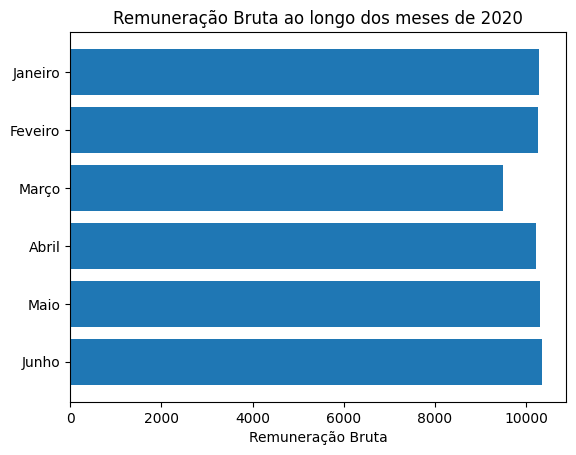

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
meses = ('Janeiro', 'Feveiro', 'Março', 'Abril','Maio', 'Junho')
y_pos = np.arange(len(meses))
remuneracaoBruta = mediaRemuneracaoBrutaColaboradores

ax.barh(y_pos, remuneracaoBruta,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(meses)
ax.invert_yaxis()
ax.set_xlabel('Remuneração Bruta')
ax.set_title('Remuneração Bruta ao longo dos meses de 2020')

plt.show()


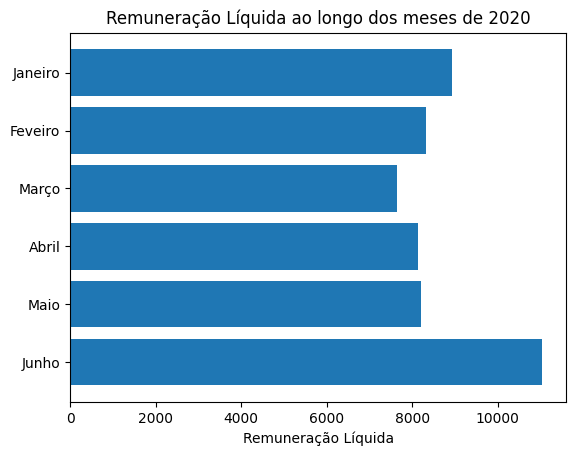

In [7]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
meses = ('Janeiro', 'Feveiro', 'Março', 'Abril','Maio', 'Junho')
y_pos = np.arange(len(meses))
remuneracaoBruta = mediaRemuneracaoLiquidaColaboradores

ax.barh(y_pos, remuneracaoBruta,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(meses)
ax.invert_yaxis()
ax.set_xlabel('Remuneração Líquida')
ax.set_title('Remuneração Líquida ao longo dos meses de 2020')

plt.show()


In [8]:
for i in range(nMeses):
    mes = i+1
    print('A média de salário BRUTO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano,mediaRemuneracaoBrutaColaboradores[i]))
    print('O menor salário BRUTO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano,minRemuneracaoBrutaColaboradores[i]))
    print('O maior salário BRUTO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano,maxRemuneracaoBrutaColaboradores[i]))
    print('A média de salário LÍQUIDO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano, mediaRemuneracaoLiquidaColaboradores[i]))
    print('O menor salário LÍQUIDO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano,minRemuneracaoLiquidaColaboradores[i]))
    print('O maior salário LÍQUIDO dos %s no mês %02d do ano de %d é de: R$ %.2f' % (dtype.upper(), mes, ano,maxRemuneracaoLiquidaColaboradores[i]))
    print('___________________________________________________________________________\n')

A média de salário BRUTO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ 10269.55
O menor salário BRUTO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ 0.00
O maior salário BRUTO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ 64795.84
A média de salário LÍQUIDO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ 8930.27
O menor salário LÍQUIDO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ -26168.36
O maior salário LÍQUIDO dos SERVIDORES no mês 01 do ano de 2020 é de: R$ 93205.65
___________________________________________________________________________

A média de salário BRUTO dos SERVIDORES no mês 02 do ano de 2020 é de: R$ 10248.06
O menor salário BRUTO dos SERVIDORES no mês 02 do ano de 2020 é de: R$ 0.00
O maior salário BRUTO dos SERVIDORES no mês 02 do ano de 2020 é de: R$ 64795.84
A média de salário LÍQUIDO dos SERVIDORES no mês 02 do ano de 2020 é de: R$ 8330.98
O menor salário LÍQUIDO dos SERVIDORES no mês 02 do ano de 2020 é de: R$ -22765.26
O maior salário LÍQUIDO dos S